# Linear Algebra and Linear Regression (Part 1)

## Sum of Squares Error

Minimizing the sum of squares error was first proposed by [Legendre](http://en.wikipedia.org/wiki/Adrien-Marie_Legendre) in 1805. His book, which was on the orbit of comets, is available on google books, we can take a look at the relevant page by calling the code below.

In [1]:
target = 'http://books.google.co.uk/books?id=spcAAAAAMAAJ&pg=PA72&output=embed'
width=700
height=500
from IPython.display import IFrame
IFrame(target, width=width, height=height)

After running the previous cell, you should see the Google books link embedded in the notebook. If you can't display it, go directly to the Google books link [here](http://books.google.co.uk/books?id=spcAAAAAMAAJ&pg=PA72&output=embed)

Of course, the main text is in French, but the key part we are interested in can be roughly translated as

"In most matters where we take measures data through observation, the most accurate results they can offer, it is almost always leads to a system of equations of the form
$$E = a + bx + cy + fz + etc .$$
where a, b, c, f etc are the known coefficients and  x , y, z etc are unknown and must be determined by the condition that the value of E is reduced, for each equation, to an amount or zero or very small."

He continues

"Of all the principles that we can offer for this item, I think it is not broader, more accurate, nor easier than the one we have used in previous research application, and that is to make the minimum sum of the squares of the errors. By this means, it is between the errors a kind of balance that prevents extreme to prevail, is very specific to make known the state of the closest to the truth system. The sum of the squares of the errors $E^2 + \left.E^\prime\right.^2 + \left.E^{\prime\prime}\right.^2 + etc$ being
\begin{align*}   &(a + bx + cy + fz + etc)^2 \\
+ &(a^\prime + b^\prime x + c^\prime y + f^\prime z + etc ) ^2\\
+ &(a^{\prime\prime} + b^{\prime\prime}x  + c^{\prime\prime}y +  f^{\prime\prime}z + etc )^2 \\
+ & etc
\end{align*}
if we wanted a minimum, by varying x alone, we will have the equation ..."

This is the earliest know printed version of the problem of least squares. The notation, however, is a little awkward for mordern eyes. In particular Legendre doesn't make use of the sum sign,
$$
\sum_{i=1}^3 z_i = z_1 + z_2 + z_3
$$
nor does he make use of the inner product.

In our notation, if we were to do linear regression, we would need to substitute:
\begin{align*}
a &\leftarrow y_1-c, \\ a^\prime &\leftarrow y_2-c,\\ a^{\prime\prime} &\leftarrow y_3 -c,\\
\text{etc.}
\end{align*}
to introduce the data observations $\{y_i\}_{i=1}^{n}$ alongside $c$, the offset. We would then introduce the input locations
\begin{align*}
b & \leftarrow x_1,\\
b^\prime & \leftarrow x_2,\\
b^{\prime\prime} & \leftarrow x_3,\\
\text{etc.}
\end{align*}
and finally the gradient of the function
$$x \leftarrow -m.$$
The remaining coefficients ($c$ and $f$) would then be zero. That would give us
\begin{align*}   &(y_1 - (mx_1+c))^2 \\
+ &(y_2 -(mx_2 + c))^2\\
+ &(y_3 -(mx_3 + c))^2 \\
+ & \text{etc.}
\end{align*}
which we would write in the modern notation for sums as
$$
\sum_{i=1}^n (y_i-(mx_i + c))^2
$$
which is recognised as the sum of squares error for a linear regression.

This shows the advantage of modern [summation operator](http://en.wikipedia.org/wiki/Summation), $\sum$,  in keeping our mathematical notation compact. Whilst it may look more complicated the first time you see it, understanding the mathematical rules that go around it, allows us to go much further with the notation.

Inner products (or [dot products](http://en.wikipedia.org/wiki/Dot_product)) are similar. They allow us to write
$$
\sum_{i=1}^q u_i v_i
$$
in a more compact notation,
$
\mathbf{u}\cdot\mathbf{v}.
$

Here we are using bold face to represent vectors, and we assume that the individual elements of a vector $\mathbf{z}$ are given as a series of scalars
$$
\mathbf{z} = \begin{bmatrix} z_1\\ z_2\\ \vdots\\ z_n \end{bmatrix}
$$
which are each indexed by their position in the vector.

## Linear Algebra

Linear algebra provides a very similar role, when we introduce [linear algebra](http://en.wikipedia.org/wiki/Linear_algebra), it is because we are faced with a large number of addition and multiplication operations. These operations need to be done together and would be very tedious to write down as a group. So the first reason we reach for linear algebra is for a more compact representation of our mathematical formulae.

### Running Example: Olympic Marathons

Now we will load in the Olympic marathon data. This is data of the olympic marathon times for the men's marathon from the first olympics in 1896 up until the London 2012 olympics.

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/maalvarezl/MLAI/master/Labs/datasets/olympic_marathon_men.csv', header=None, encoding= 'unicode_escape')
x = np.array(data.iloc[:, 0].values).reshape(-1,1)
y = np.array(data.iloc[:, 1].values).reshape(-1,1)

You can see what these values are by typing:

In [3]:
y

array([[4.47083333],
       [4.46472926],
       [5.22208333],
       [4.15467867],
       [3.90331675],
       [3.56951267],
       [3.82454477],
       [3.62483707],
       [3.59284275],
       [3.53880792],
       [3.67010309],
       [3.39029111],
       [3.43642612],
       [3.20583007],
       [3.13275665],
       [3.32819844],
       [3.13583758],
       [3.0789588 ],
       [3.10581822],
       [3.06552909],
       [3.09357349],
       [3.16111704],
       [3.14255244],
       [3.08527867],
       [3.10265829],
       [2.99877553],
       [3.03392977]])

In [4]:
print(x)
print(y)

[[1896]
 [1900]
 [1904]
 [1908]
 [1912]
 [1920]
 [1924]
 [1928]
 [1932]
 [1936]
 [1948]
 [1952]
 [1956]
 [1960]
 [1964]
 [1968]
 [1972]
 [1976]
 [1980]
 [1984]
 [1988]
 [1992]
 [1996]
 [2000]
 [2004]
 [2008]
 [2012]]
[[4.47083333]
 [4.46472926]
 [5.22208333]
 [4.15467867]
 [3.90331675]
 [3.56951267]
 [3.82454477]
 [3.62483707]
 [3.59284275]
 [3.53880792]
 [3.67010309]
 [3.39029111]
 [3.43642612]
 [3.20583007]
 [3.13275665]
 [3.32819844]
 [3.13583758]
 [3.0789588 ]
 [3.10581822]
 [3.06552909]
 [3.09357349]
 [3.16111704]
 [3.14255244]
 [3.08527867]
 [3.10265829]
 [2.99877553]
 [3.03392977]]


Note that they are not `pandas` data frames for this example, they are just arrays of dimensionality $n\times 1$, where $n$ is the number of data.

The aim of this lab is to have you coding linear regression in python. We will do it in two ways, once using iterative updates (coordinate ascent) and then using linear algebra. The linear algebra approach will not only work much better, it is easy to extend to multiple input linear regression and *non-linear* regression using basis functions.

### Plotting the Data

You can make a plot of $y$ vs $x$ with the following command:

Text(0, 0.5, 'pace in min/km')

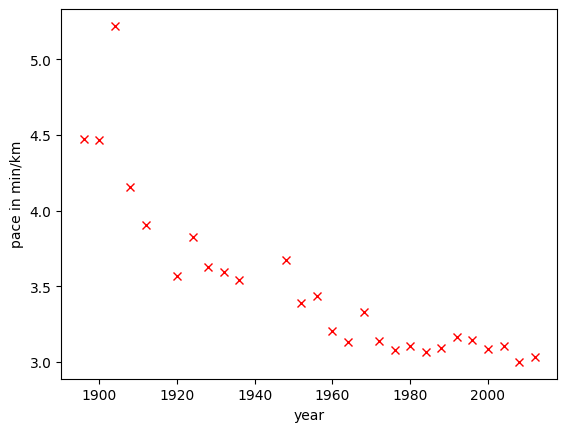

In [5]:
%matplotlib inline
import pylab as plt

plt.plot(x, y, 'rx')
plt.xlabel('year')
plt.ylabel('pace in min/km')

### Maximum Likelihood: Iterative Solution

Now we will take the maximum likelihood approach we studied in the lecture to fit a line, $y_i=mx_i + c$, to the data you've plotted. We are trying to minimize the error function:

$$E(m, c) =  \sum_{i=1}^n(y_i-mx_i-c)^2$$

with respect to $m$ and $c$. We can start with an initial guess for $m$,

In [6]:
m = -0.4
c = 80

Then we use the maximum likelihood update to find an estimate for the offset, $c$.

### Coordinate Descent

In the lecture, we saw how the steepest decent algorithm works. Here, we explain another approach. It is known as *coordinate descent*. In coordinate descent, we choose to move one parameter at a time. Ideally, we design an algorithm that at each step moves the parameter to its minimum value. At each step we choose to move the individual parameter to its minimum.

To find the minimum, we look for the point in the curve where the gradient is zero. This can be found by taking the gradient of $E(m,c)$ with respect to the parameter.

#### Update for Offset

Let's consider the parameter $c$ first. The gradient goes nicely through the summation operator, and we obtain
$$
\frac{\text{d}E(m,c)}{\text{d}c} = -\sum_{i=1}^n 2(y_i-mx_i-c).
$$
Now we want the point that is a minimum. A minimum is an example of a [*stationary point*](http://en.wikipedia.org/wiki/Stationary_point), the stationary points are those points of the function where the gradient is zero. They are found by solving the equation for $\frac{\text{d}E(m,c)}{\text{d}c} = 0$. Substituting in to our gradient, we can obtain the following equation,
$$
0 = -\sum_{i=1}^n 2(y_i-mx_i-c)
$$
which can be reorganised as follows,
$$
c^* = \frac{\sum_{i=1}^n(y_i-m^*x_i)}{n}.
$$
The fact that the stationary point is easily extracted in this manner implies that the solution is *unique*. There is only one stationary point for this system. Traditionally when trying to determine the type of stationary point we have encountered we now compute the *second derivative*,
$$
\frac{\text{d}^2E(m,c)}{\text{d}c^2} = 2n.
$$
The second derivative is positive, which in turn implies that we have found a minimum of the function. This means that setting $c$ in this way will take us to the lowest point along that axes.

In [7]:
# set c to the minimum
c = (y - m*x).mean()
print(c)

786.0197711451852


#### Update for Slope

Now we have the offset set to the minimum value, in coordinate descent, the next step is to optimise another parameter. Only one further parameter remains. That is the slope of the system.

Now we can turn our attention to the slope. We once again peform the same set of computations to find the minima. We end up with an update equation of the following form.

$$m^* = \frac{\sum_{i=1}^n (y_i - c)x_i}{\sum_{i=1}^n x_i^2}$$

Communication of mathematics in data science is an essential skill, in a moment, you will be asked to rederive the equation above. Before we do that, however, we will briefly review how to write mathematics in the notebook.

### $\LaTeX$ for Maths

These cells use [Markdown format](http://en.wikipedia.org/wiki/Markdown). You can include maths in your markdown using [$\LaTeX$ syntax](http://en.wikipedia.org/wiki/LaTeX), all you have to do is write your answer inside dollar signs, as follows:

To write a fraction, we write `$\frac{a}{b}$`, and it will display like this $\frac{a}{b}$. To write a subscript we write `$a_b$` which will appear as $a_b$. To write a superscript (for example in a polynomial) we write `$a^b$` which will appear as $a^b$. There are lots of other macros as well, for example we can do greek letters such as `$\alpha, \beta, \gamma$` rendering as $\alpha, \beta, \gamma$. And we can do sum and intergral signs as `$\sum \int \int$`.

You can combine many of these operations together for composing expressions.

### Question 1

Convert the following python code expressions into $\LaTeX$j, writing your answers below. In each case write your answer as a single equality (i.e. your maths should only contain one expression, not several lines of expressions). For the purposes of your $\LaTeX$ please assume that `x` and `w` are $n$ dimensional vectors.

(a)
``` python
f = x.sum()
```

(b)
``` python
m = x.mean()
```

(c)
``` python
g = (x*w).sum()
```

#### Question 1 Answer

$f=\sum_{i=1}^n x_i$

$m=\frac{f}{n}$

$g = x^Tw$

### Gradient With Respect to the Slope
Now that you've had a little training in writing maths with $\LaTeX$, we will be able to use it to answer questions. The next thing we are going to do is a little differentiation practice.

### Question 2

Derive the the gradient of the objective function with respect to the slope, $m$. Rearrange it to show that the update equation written above does find the stationary points of the objective function. By computing its derivative show that it's a minimum.

#### Question 2 Answer
$\frac{dE(m,c)}{dm}= -\sum_{i=1}^n 2x_i(y_i-mx_i-c)$

$-\sum_{i=1}^n 2x_i(y_i-m^*x_i-c^*)=0$

$m^*\sum_{i=1}^n x_i^2=\sum_{i=1}^n(y_i-c^*)x_i$

$m^*=\frac{\sum_{i=1}^n(y_i-c^*)x_i}{\sum_{i=1}^n x_i^2}$

$\frac{d^2E(m,c)}{dm^2}= \sum_{i=1}^n 2x_i$


We can have a look at how good our fit is by computing the prediction across the input space. First create a vector of 'test points',

In [8]:
x_test = np.linspace(1890, 2020, 130)[:, None]

In [9]:
m

-0.4

Now use this vector to compute some test predictions,

In [10]:
f_test = m*x_test + c
f_test

array([[ 30.01977115],
       [ 29.61667037],
       [ 29.21356959],
       [ 28.81046882],
       [ 28.40736804],
       [ 28.00426727],
       [ 27.60116649],
       [ 27.19806572],
       [ 26.79496494],
       [ 26.39186417],
       [ 25.98876339],
       [ 25.58566262],
       [ 25.18256184],
       [ 24.77946107],
       [ 24.37636029],
       [ 23.97325952],
       [ 23.57015874],
       [ 23.16705797],
       [ 22.76395719],
       [ 22.36085642],
       [ 21.95775564],
       [ 21.55465487],
       [ 21.15155409],
       [ 20.74845332],
       [ 20.34535254],
       [ 19.94225177],
       [ 19.53915099],
       [ 19.13605021],
       [ 18.73294944],
       [ 18.32984866],
       [ 17.92674789],
       [ 17.52364711],
       [ 17.12054634],
       [ 16.71744556],
       [ 16.31434479],
       [ 15.91124401],
       [ 15.50814324],
       [ 15.10504246],
       [ 14.70194169],
       [ 14.29884091],
       [ 13.89574014],
       [ 13.49263936],
       [ 13.08953859],
       [ 12

Now plot those test predictions with a blue line on the same plot as the data,

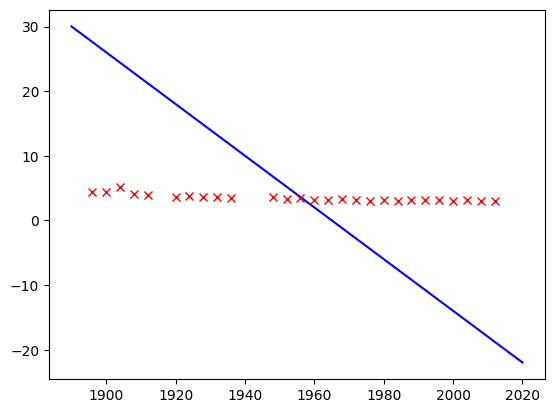

In [11]:
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

The fit isn't very good, we need to iterate between these parameter updates in a loop to improve the fit, we have to do this several times,

In [12]:
for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]
print(m)
print(c)

-0.3987259642504537
783.5273797269986


And let's try plotting the result again

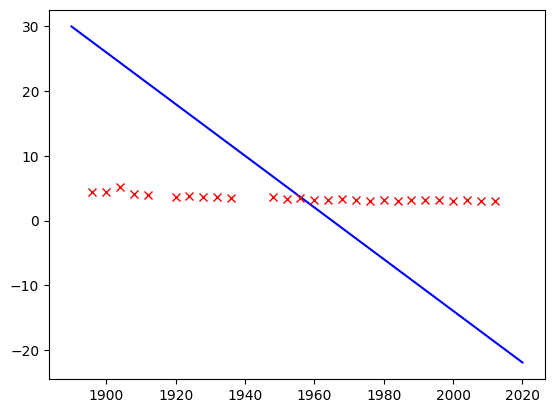

In [13]:
f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

Clearly we need more iterations than 10! In the next question you will add more iterations and report on the error as optimisation proceeds.

### Question 3

There is a problem here, we seem to need many interations to get to a good solution. Let's explore what's going on. Write code which alternates between updates of `c` and `m`. Include the following features in your code.

(a) Initialise with `m=-0.4` and `c=80`.
(b) Every 10 iterations compute the value of the objective function for the training data and print it to the screen (you'll find hints on this in the lab from last week.
(c) Cause the code to stop running when the error change over less than 10 iterations is smaller than $1\times10^{-4}$. This is known as a stopping criterion.

Why do we need so many iterations to get to the solution?

24.93061542610306
24.779760967112086
24.629898074197822
24.481020229798286
24.33312095919156
24.186193830213902
24.040232452980188
23.89523047960615
23.751181603931776
23.608079561247553
23.465918128022416
23.324691121631865
23.184392400090143
23.04501586178281
22.906555445201015
22.76900512867836
22.63235893012887
22.496610906786987
22.361755154948536
22.227785809714717
22.09469704473653
21.96248307196144
21.831138141382365
21.70065654078605
21.571032595506562
21.44226066817668
21.31433515848457
21.187250502928293
21.061001174575193
20.93558168282119
20.81098657315189
20.68721042690543
20.56424786103681
20.442093527883493
20.320742114933555
20.20018834459388
20.0804269739612
19.961452794593693
19.843260632284586
19.725845346837335
19.609201831841638
19.493325014451766
19.378209855165856
19.26385134760661
19.150244518303648
19.037384426477217
18.925266163823213
18.813884854299854
18.703235653915787
18.593313750518828
18.48411436358728
18.375632744021836
18.267864173938854
18.1608039664

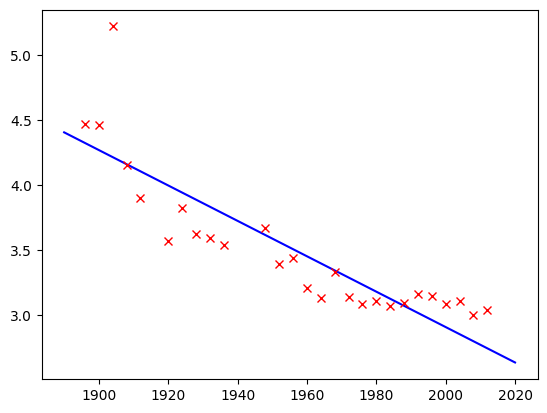

In [14]:
# Question 3 Answer Code
# Write code for you answer to this question in this box
m=-0.4
c=80

for i in np.arange(10):
    m = ((y - c)*x).sum()/(x*x).sum()
    c = (y-m*x).sum()/y.shape[0]

f = m*x + c
obj_init= ((y-f)**2).sum()
dif =1
while dif>1e-4:
  for i in np.arange(10):
      m = ((y - c)*x).sum()/(x*x).sum()
      c = (y-m*x).sum()/y.shape[0]

  f = m*x + c
  obj= ((y-f)**2).sum()
  print(obj)
  dif = np.abs(obj-obj_init)
  obj_init = obj

f_test = m*x_test + c
plt.plot(x_test, f_test, 'b-')
plt.plot(x, y, 'rx')

In [15]:
print(m,c)

-0.013646209704384044 30.19728212983575


## Multiple Input Solution with Linear Algebra

You've now seen how slow it can be to perform a coordinate ascent on a system. Another approach to solving the system (which is not always possible, particularly in *non-linear* systems) is to go directly to the minimum. To do this we need to introduce *linear algebra*. We will represent all our errors and functions in the form of linear algebra.

As we mentioned above, linear algebra is just a shorthand for performing lots of multiplications and additions simultaneously. What does it have to do with our system then? Well the first thing to note is that the linear function we were trying to fit has the following form:
$$
f(x) = mx + c
$$
the classical form for a straight line. From a linear algebraic perspective we are looking for multiplications and additions. We are also looking to separate our parameters from our data. The data is the *givens* remember, in French the word is données literally translated means *givens* that's great, because we don't need to change the data, what we need to change are the parameters (or variables) of the model. In this function the data comes in through $x$, and the parameters are $m$ and $c$.

What we'd like to create is a vector of parameters and a vector of data. Then we could represent the system with vectors that represent the data, and vectors that represent the parameters.

We look to turn the multiplications and additions into a linear algebraic form, we have one multiplication ($m\times c$) and one addition ($mx + c$). But we can turn this into a inner product by writing it in the following way,
$$
f(x) = m \times x + c \times 1,
$$
in other words we've extracted the unit value, from the offset, $c$. We can think of this unit value like an extra item of data, because it is always given to us, and it is always set to 1 (unlike regular data, which is likely to vary!). We can therefore write each input data location, $\mathbf{x}$, as a vector
$$
\mathbf{x} = \begin{bmatrix} 1\\ x\end{bmatrix}.
$$

Now we choose to also turn our parameters into a vector. The parameter vector will be defined to contain
$$
\mathbf{w} = \begin{bmatrix} c \\ m\end{bmatrix}
$$
because if we now take the inner product between these to vectors we recover
$$
\mathbf{x}\cdot\mathbf{w} = 1 \times c + x \times m = mx + c
$$
In `numpy` we can define this vector as follows

In [16]:
# define the vector w
w = np.zeros(shape=(2, 1))
w[0] = c
w[1] = m

This gives us the equivalence between original operation and an operation in vector space. Whilst the notation here isn't a lot shorter, the beauty is that we will be able to add as many features as we like and still keep the same representation. In general, we are now moving to a system where each of our predictions is given by an inner product. When we want to represent a linear product in linear algebra, we tend to do it with the transpose operation, so since we have $\mathbf{a}\cdot\mathbf{b} = \mathbf{a}^\top\mathbf{b}$ we can write
$$
f(\mathbf{x}_i) = \mathbf{x}_i^\top\mathbf{w}.
$$
Where we've assumed that each data point, $\mathbf{x}_i$, is now written by appending a 1 onto the original vector
$$
\mathbf{x}_i =
\begin{bmatrix}
1 \\
x_i
\end{bmatrix}
$$

## Design Matrix

We can do this for the entire data set to form a [*design matrix*](http://en.wikipedia.org/wiki/Design_matrix) $\mathbf{X}$,

$$\mathbf{X} = \begin{bmatrix}
\mathbf{x}_1^\top \\\
\mathbf{x}_2^\top \\\
\vdots \\\
\mathbf{x}_n^\top
\end{bmatrix} = \begin{bmatrix}
1 & x_1 \\\
1 & x_2 \\\
\vdots & \vdots \\\
1 & x_n
\end{bmatrix},$$

which in `numpy` can be done with the following commands:

In [17]:
X = np.hstack((np.ones_like(x), x))
print(X)

[[   1 1896]
 [   1 1900]
 [   1 1904]
 [   1 1908]
 [   1 1912]
 [   1 1920]
 [   1 1924]
 [   1 1928]
 [   1 1932]
 [   1 1936]
 [   1 1948]
 [   1 1952]
 [   1 1956]
 [   1 1960]
 [   1 1964]
 [   1 1968]
 [   1 1972]
 [   1 1976]
 [   1 1980]
 [   1 1984]
 [   1 1988]
 [   1 1992]
 [   1 1996]
 [   1 2000]
 [   1 2004]
 [   1 2008]
 [   1 2012]]


### Writing the Objective with Linear Algebra

When we think of the objective function, we can think of it as the errors where the error is defined in a similar way to what it was in Legendre's day $y_i - f(\mathbf{x}_i)$, in statistics these errors are also sometimes called [*residuals*](http://en.wikipedia.org/wiki/Errors_and_residuals_in_statistics). So we can think as the objective and the prediction function as two separate parts, first we have,
$$
E(\mathbf{w}) = \sum_{i=1}^n (y_i - f(\mathbf{x}_i; \mathbf{w}))^2,
$$
where we've made the function $f(\cdot)$'s dependence on the parameters $\mathbf{w}$ explicit in this equation. Then we have the definition of the function itself,
$$
f(\mathbf{x}_i; \mathbf{w}) = \mathbf{x}_i^\top \mathbf{w}.
$$
Let's look again at these two equations and see if we can identify any inner products. The first equation is a sum of squares, which is promising. Any sum of squares can be represented by an inner product,
$$
a = \sum_{i=1}^{k} b^2_i = \mathbf{b}^\top\mathbf{b},
$$
so if we wish to represent $E(\mathbf{w})$ in this way, all we need to do is convert the sum operator to an inner product. We can get a vector from that sum operator by placing both $y_i$ and $f(\mathbf{x}_i; \mathbf{w})$ into vectors, which we do by defining
$$
\mathbf{y} = \begin{bmatrix}y_1\\y_2\\ \vdots \\ y_n\end{bmatrix}
$$
and defining
$$
\mathbf{f}(\mathbf{X}; \mathbf{w}) = \begin{bmatrix}f(\mathbf{x}_1; \mathbf{w})\\f(\mathbf{x}_2; \mathbf{w})\\ \vdots \\ f(\mathbf{x}_n; \mathbf{w})\end{bmatrix}.
$$
The second of these is actually a vector-valued function. This term may appear intimidating, but the idea is straightforward. A vector valued function is simply a vector whose elements are themselves defined as *functions*, i.e. it is a vector of functions, rather than a vector of scalars. The idea is so straightforward, that we are going to ignore it for the moment, and barely use it in the derivation. But it will reappear later when we introduce *basis functions*. So we will, for the moment, ignore the dependence of $\mathbf{f}$ on $\mathbf{w}$ and $\mathbf{X}$ and simply summarise it by a vector of numbers
$$
\mathbf{f} = \begin{bmatrix}f_1\\f_2\\ \vdots \\ f_n\end{bmatrix}.
$$
This allows us to write our objective in the folowing, linear algebraic form,
$$
E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})
$$
from the rules of inner products.

But what of our matrix $\mathbf{X}$ of input data? At this point, we need to dust off [*matrix-vector multiplication*](http://en.wikipedia.org/wiki/Matrix_multiplication). Matrix multiplication is simply a convenient way of performing many inner products together, and it's exactly what we need to summarise the operation
$$
f_i = \mathbf{x}_i^\top\mathbf{w}.
$$
This operation tells us that each element of the vector $\mathbf{f}$ (our vector valued function) is given by an inner product between $\mathbf{x}_i$ and $\mathbf{w}$. In other words it is a series of inner products. Let's look at the definition of matrix multiplication, it takes the form
$$
\mathbf{c} = \mathbf{B}\mathbf{a}
$$
where $\mathbf{c}$ might be a $k$ dimensional vector (which we can intepret as a $k\times 1$ dimensional matrix), and $\mathbf{B}$ is a $k\times k$ dimensional matrix and $\mathbf{a}$ is a $k$ dimensional vector ($k\times 1$ dimensional matrix).

The result of this multiplication is of the form
$$
\begin{bmatrix}c_1\\c_2 \\ \vdots \\ c_k\end{bmatrix} =
\begin{bmatrix} b_{1,1} & b_{1, 2} & \dots & b_{1, k} \\
b_{2, 1} & b_{2, 2} & \dots & b_{2, k} \\
\vdots & \vdots & \ddots & \vdots \\
b_{k, 1} & b_{k, 2} & \dots & b_{k, k} \end{bmatrix} \begin{bmatrix}a_1\\a_2 \\ \vdots\\ a_k\end{bmatrix} = \begin{bmatrix} b_{1, 1}a_1 + b_{1, 2}a_2 + \dots + b_{1, k}a_k\\
b_{2, 1}a_1 + b_{2, 2}a_2 + \dots + b_{2, k}a_k \\
\vdots\\
b_{k, 1}a_1 + b_{k, 2}a_2 + \dots + b_{k, k}a_k\end{bmatrix}
$$
so we see that each element of the result in $\mathbf{c}$ is simply the inner product between each *row* of $\mathbf{B}$ and the vector $\mathbf{a}$. Because we have defined each element of $\mathbf{f}$ to be given by the inner product between each *row* of the design matrix and the vector $\mathbf{w}$ we now can write the full operation in one matrix multiplication,
$$
\mathbf{f} = \mathbf{X}\mathbf{w}.
$$

In [18]:
f = np.dot(X, w) # np.dot does matrix multiplication in python

Combining this result with our objective function,
$$
E(\mathbf{w}) = (\mathbf{y} - \mathbf{f})^\top(\mathbf{y} - \mathbf{f})
$$
we find we have defined the *model* with two equations. One equation tells us the form of our predictive function and how it depends on its parameters, the other tells us the form of our objective function.

In [19]:
resid = (y-f)
E = np.dot(resid.T, resid) # matrix multiplication on a single vector is equivalent to a dot product.
print("Error function is:", E)

Error function is: [[1.99507922]]
